# Data Madness
## Group idk

### authors:
* Simon Garland
* PierrePaul Charbonnier
* Filip Straka

Department of Advanced Computing Sciences
Maastricht University
March 2024

Let's begin with extracting the data from the ZIP files (they'll grow tremendously)

In [132]:
import os.path

# NB: im doing it on a small fraction of the data now to prevent my laptop from blowing up ever so nicely

## imports ##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

## vvvvvvvvvv      set your data here      vvvvvvvvvv

a.k.a. define the modes, years, and months you want to include

In [133]:
# define all possible files
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
years = ['21'] # "22", "23", "24"
years1 = ['22'] # "22", "23", "24"
years2 = ['23'] # "22", "23", "24"
years3 = ['24'] # "22", "23", "24"
modes = ["standard"] # "rapid", "blitz"

In [134]:
for month in months:
    for mode in modes:
        for year in years:
            path = '../data_zipped/'+mode+"_"+month+year+"frl_xml.zip"
            if os.path.exists(path):
                with zipfile.ZipFile(path, 'r') as zip_ref:
                    zip_ref.extractall('../data_unzipped')

In [135]:
lst_std = []
lst_rapid = []
lst_blitz = []

In [136]:
def xml_to_list(months_, years_, mode_):
    lst = []
    for month_ in months_:
        for year_ in years_:
            path_ = '../data_unzipped/'+mode_+"_"+month_+year_+"frl_xml.xml"
            if os.path.exists(path_):
                df = pd.read_xml(path_)
                # making sure we don't add useless people
                df.dropna(subset=['rating','birthday','sex','name','country'])
                df.add_suffix(month_+year_)
                df.head(10)
                lst.append(df)
    return lst

## vvvvvvvvvv      get your data here      vvvvvvvvvv

In [137]:
lst_std_ = xml_to_list(months, years, "standard")
print(lst_std_)
lst_std_1 = xml_to_list(months, years1, "standard")
print(lst_std_1)


[          fideid                      name country sex title w_title o_title  \
0       25121731                A C J John     IND   M  None    None    None   
1       35077023            A Chakravarthy     IND   M  None    None    None   
2       10207538          A E M, Doshtagir     BAN   M  None    None    None   
3       10680810  A hamed Ashraf, Abdallah     EGY   M  None    None    None   
4        5716365           A Hamid, Harman     MAS   M  None    None    None   
...          ...                       ...     ...  ..   ...     ...     ...   
364515  21836060               Zyto, Karol     POL   M  None    None    None   
364516  34190632            Zyubin, Sergey     RUS   M  None    None    None   
364517  24232602             Zyuzev, Pavel     RUS   M  None    None    None   
364518   1189980            Zywert, Kacper     POL   M  None    None    None   
364519  21857814       Zyznowska, Marianna     POL   F  None    None    None   

       foa_title  rating  games   k  b

In [138]:
# not used yet

int_to_mon = {
    0: "jan",
    1: "feb",
    2: "mar",
    3: "apr",
    4: "may",
    5: "jun",
    6: "jul",
    7: "aug",
    8: "sep",
    9: "oct",
    10: "nov",
    11: "dec"
}

def lst_to_df(lst):
    for i in range(len(lst)):
        lst[i] = lst[i].add_suffix('_'+str(i))
        lst[i].set_index('fideid_'+str(i), inplace=True)
        
        
    combined_df = lst[0]
    for i in range(1, len(lst)):
        combined_df = combined_df.combine_first(lst[i])
        
    return combined_df

In [139]:
df_std_ = lst_to_df(lst_std_)
df_std_1 = lst_to_df(lst_std_1)

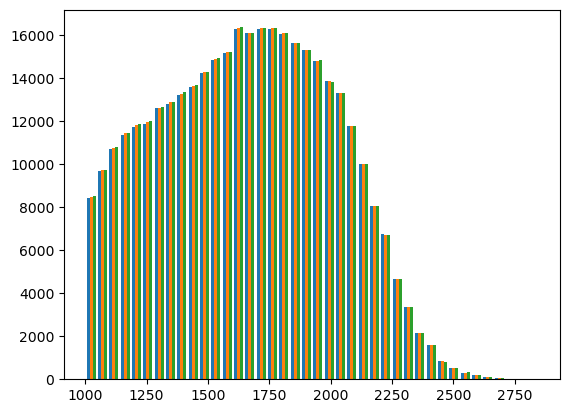

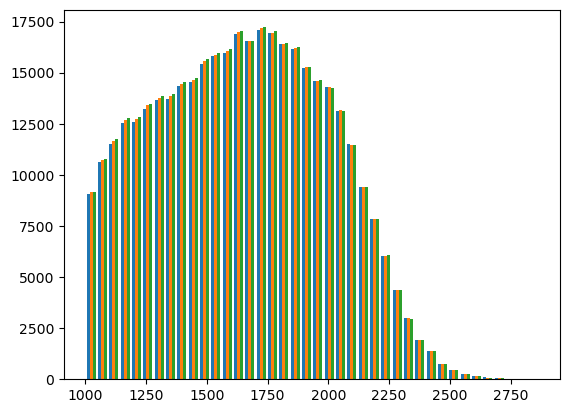

In [140]:
plt.hist([df_std_['rating_'+str(i)] for i in range(3)], bins=40)
plt.show()

plt.hist([df_std_1['rating_'+str(i)] for i in range(3)], bins=40)
plt.show()
# 

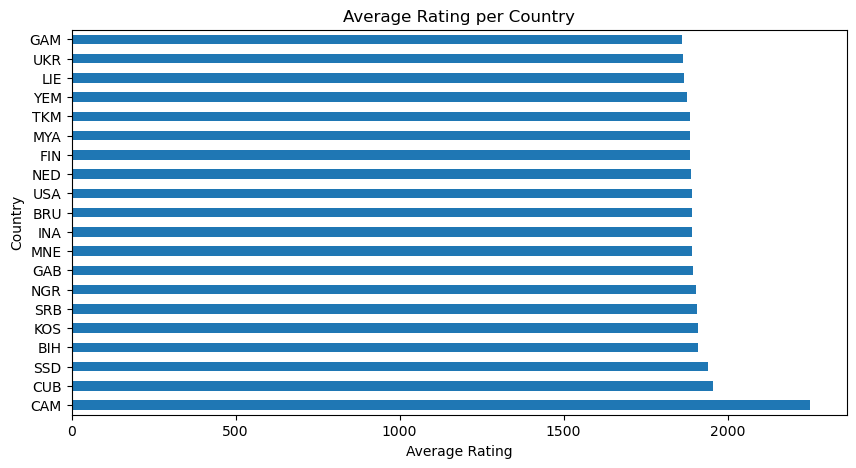

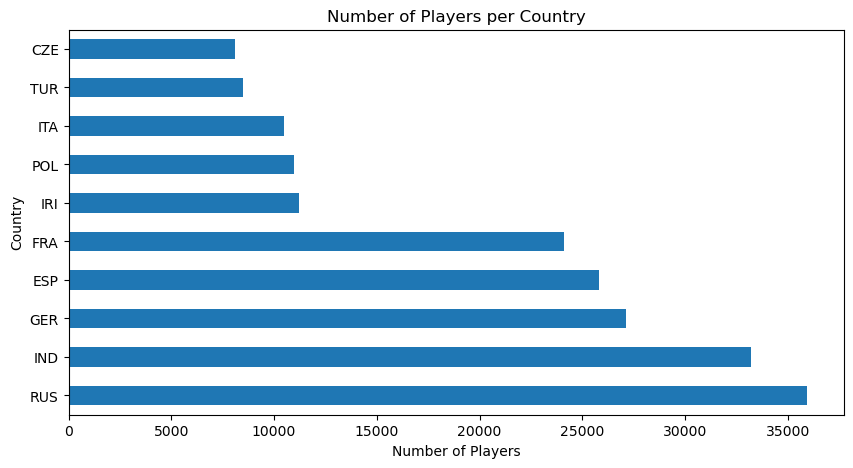

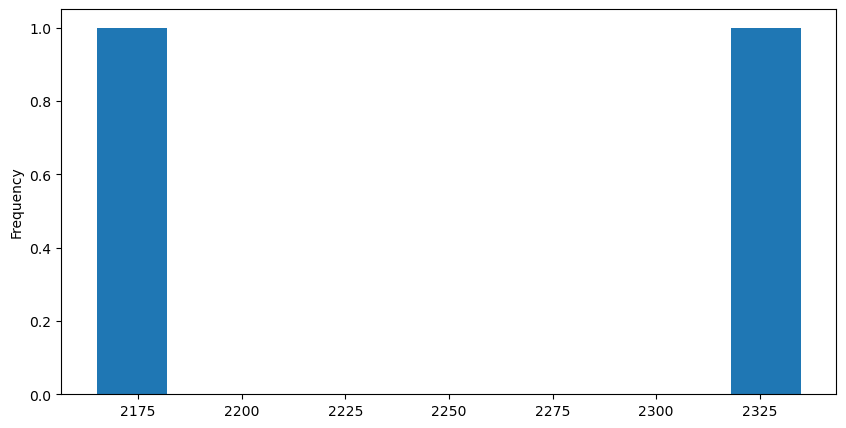

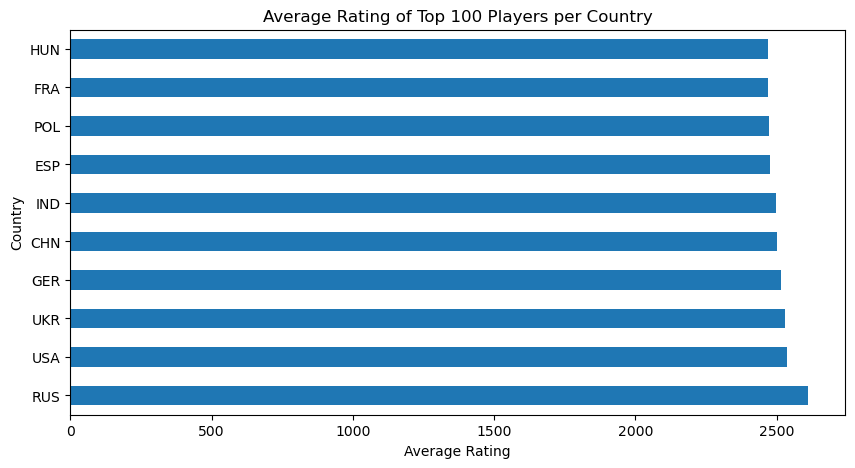

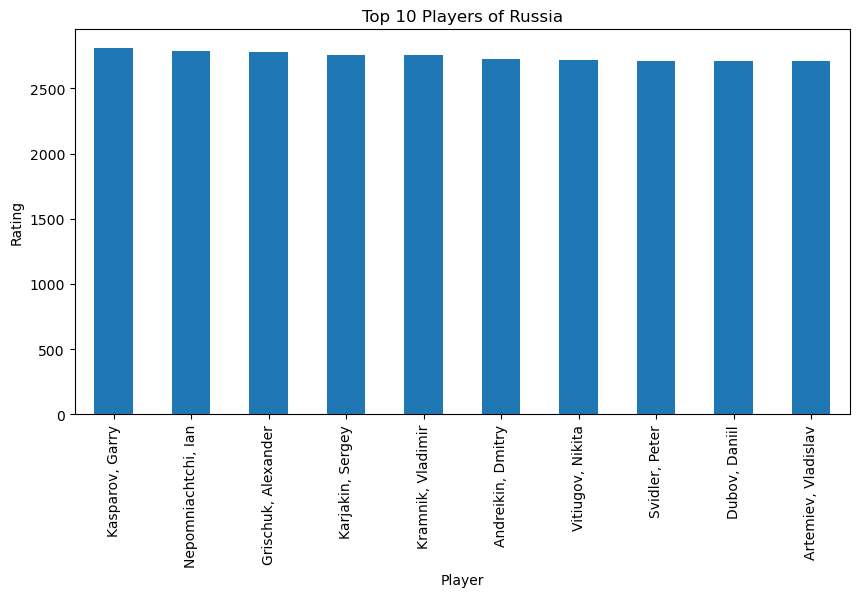

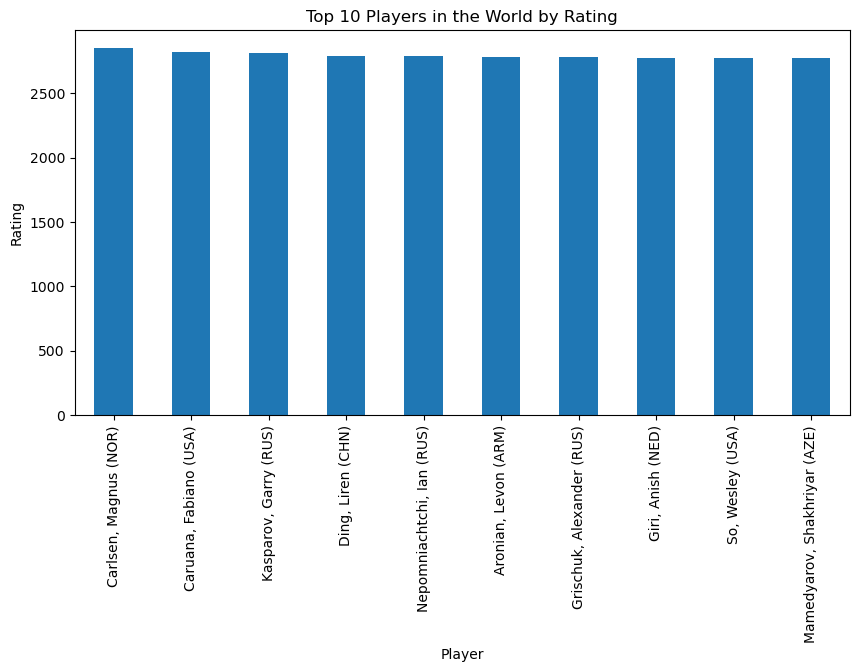

In [141]:
# Rating Insights:

# What is the average chess rating per country?


plot = df_std_['rating_0'].groupby(df_std_['country_0']).mean().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,5))
plot.set_xlabel('Average Rating')
plot.set_ylabel('Country')
plot.set_title('Average Rating per Country')
plt.show()

# CAM is the country with the highest average rating, but thats only because there is only 8 player from CAM in the dataset.
# The country with the highest average rating with a significant amount of players is ISR. with this graph

plot = df_std_['rating_0'].groupby(df_std_['country_0']).count().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5))
plot.set_xlabel('Number of Players')
plot.set_ylabel('Country')
plot.set_title('Number of Players per Country')
plt.show()

# # An other way to look at it is plotting the rating of only CAM players to see the distribution
plot = df_std_['rating_0'].groupby(df_std_['country_0']).get_group('CAM').plot(kind='hist', figsize=(10,5))
plt.show()



# In conclusion, the average rating per country is not a good indicator of the strength of the country. The number of players is a better indicator.
# Maybe we can look at the top 100 players of each country and see the average rating of those players to get a better idea of the strength of the country.


# Let's plot the top 100 players of each country and see the average rating of those players.

plot = df_std_['rating_0'].groupby(df_std_['country_0']).apply(lambda x: x.nlargest(100).mean()).sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5))
plot.set_xlabel('Average Rating')
plot.set_ylabel('Country')
plot.set_title('Average Rating of Top 100 Players per Country')
plt.show()




# Why is Russia suddenly the strongest country? It's because the top 10 players of Russia are the strongest in the world.
# Let's plot the top 10 players of Russia and see how strong they are.

russian_players = df_std_[df_std_['country_0'] == 'RUS']

# Step 2: Identify the top 10 Russian players by rating
# It's important to sort the players first to ensure nlargest works correctly after grouping (if needed)
top_10_russian_players = russian_players.nlargest(10, 'rating_0')

# For plotting, set the player names as the index (assuming player names are unique)
# If player names aren't unique, consider adding an ID or another unique identifier
plot_data = top_10_russian_players.set_index('name_0')['rating_0']

# Step 3: Plot with player names
plt.figure(figsize=(10, 5))
plot = plot_data.plot(kind='bar')
plot.set_ylabel('Rating')
plot.set_xlabel('Player')
plot.set_title('Top 10 Players of Russia')

# Display the plot
plt.show()





# Who are the top players in the world?
# Let's plot the top 10 players in the world and see how strong they are and where they are from. We can also see the distribution of the top 10 players in the world.
# how do i add the country to the plot?

df_std_['player_country'] = df_std_['name_0'] + ' (' + df_std_['country_0'] + ')'

# Step 2: Select the top 10 players by rating
top_10_players = df_std_.nlargest(10, 'rating_0')

# Create the plot for the top 10 players, using the new 'player_country' column as the index
plt.figure(figsize=(10, 5))
plot = top_10_players.set_index('player_country')['rating_0'].plot(kind='bar')
plot.set_ylabel('Rating')
plot.set_xlabel('Player')
plot.set_title('Top 10 Players in the World by Rating')

# Display the plot
plt.show()

# In conclusion, Russia has the best players because their player have the highest ratings compare to the other countries
# This can be explained by the fact that Russia has the most players in the top 100 players in the world.
# The top 10 players in the world are all from Russia and they are the strongest in the world.




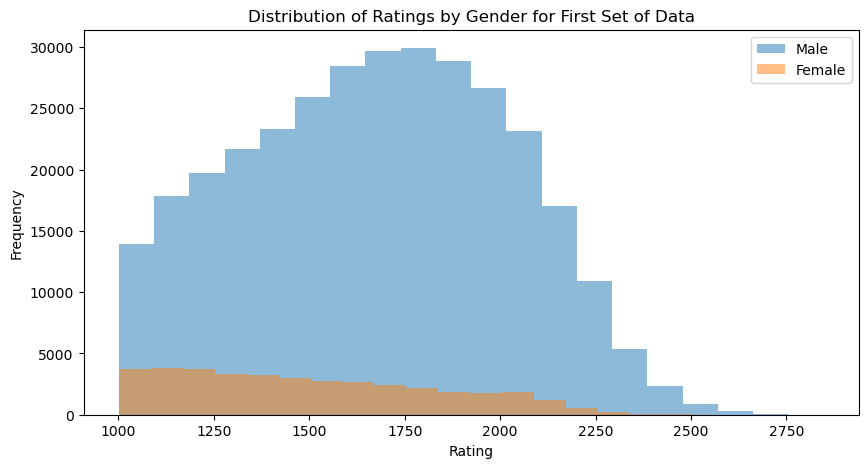

In [142]:
# How do ratings vary between genders?
# Lets plot the distribution first

# Filtering the DataFrame by gender for the first set of data
male_ratings = df_std_[df_std_['sex_0'] == 'M']['rating_0']
female_ratings = df_std_[df_std_['sex_0'] == 'F']['rating_0']

plt.figure(figsize=(10, 5))

# Plotting histograms for male and female ratings
plt.hist(male_ratings, bins=20, alpha=0.5, label='Male')
plt.hist(female_ratings, bins=20, alpha=0.5, label='Female')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings by Gender for First Set of Data')
plt.legend(loc='upper right')

plt.show()






The histogram shows a substantial disparity in the number of male (blue) versus female (orange) players across all rating levels, with male players overwhelmingly dominating the frequency counts, particularly in the mid-range ratings around 2000. Female players appear as a much smaller subset, indicating lower participation or representation within this dataset.

/var/folders/0r/mh02trg51d7880t5fblpxd5w0000gn/T/ipykernel_83452/1372169224.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_std_[df_std_['sex_0'] == 'M']['rating_0'], label='Male', shade=True)
/Users/ppch/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/0r/mh02trg51d7880t5fblpxd5w0000gn/T/ipykernel_83452/1372169224.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_std_[df_std_['sex_0'] == 'F']['rating_0'], label='Female', shade=True)
/Users/ppch/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:111

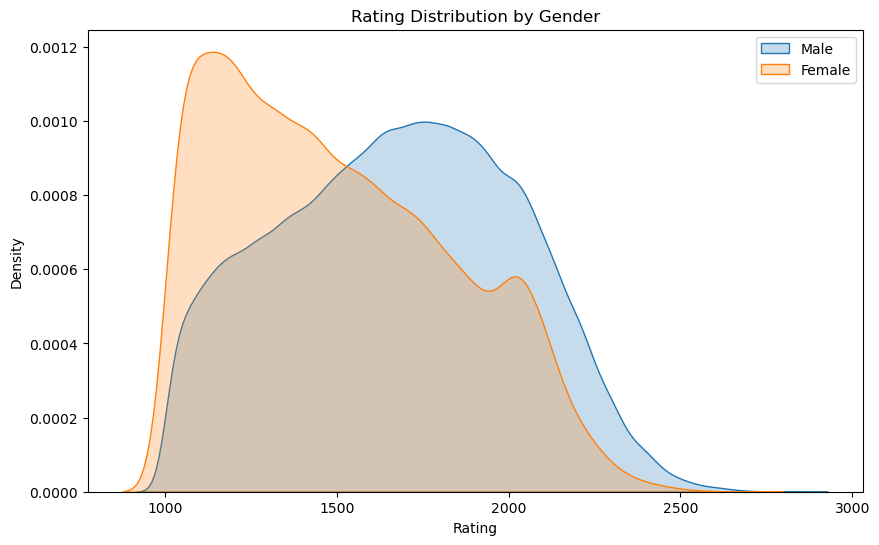

In [143]:
# What is the frequency of the ratings , how many players are there in each rating range
# The distribution is not normal, we have a lot of male players with a rating of 2000 and very little woman with a rating of 2000

# Assuming df_std_ is your DataFrame and it includes 'rating_0' and 'sex_0' columns
plt.figure(figsize=(10, 6))

sns.kdeplot(df_std_[df_std_['sex_0'] == 'M']['rating_0'], label='Male', shade=True)
sns.kdeplot(df_std_[df_std_['sex_0'] == 'F']['rating_0'], label='Female', shade=True)

plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Rating Distribution by Gender')
plt.legend()

plt.show()

At the higher end of the ratings (above 2500), the density of both male and female players drops, but it's noticeable that female players are represented even at the highest ratings, despite their lower overall density. This points to the presence of highly rated female players, although they are fewer in number.

Without actual numbers on the y-axis (density), quantitative comparisons are challenging, but qualitatively, the area under the female distribution curve appears smaller, reinforcing the point that there are fewer female players in this dataset.

The plot suggests that efforts to increase female participation in chess might be focused on the mid-range ratings (around 2000), where there is a significant drop in female player density compared to males.

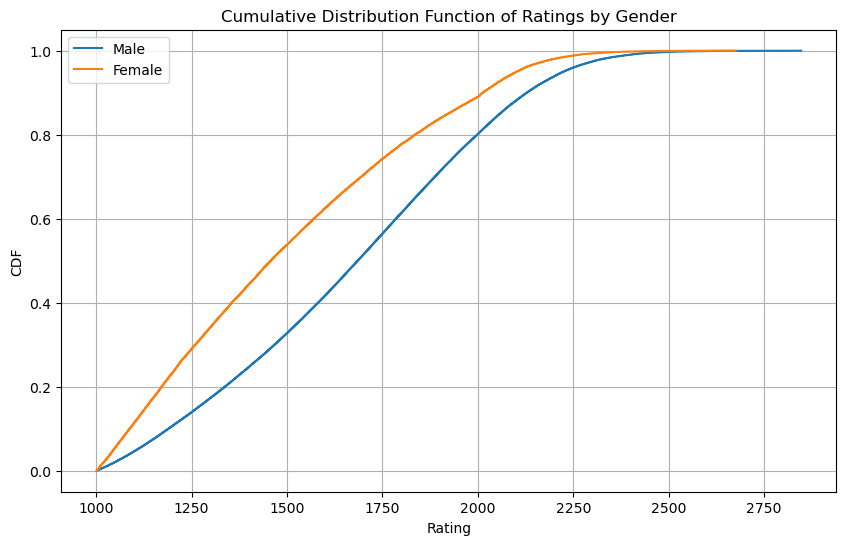

In [144]:
# lets try an Cumulative Distribution Function (CDF) to see the distribution of the ratings

# Separate the ratings for each gender
male_ratings = df_std_[df_std_['sex_0'] == 'M']['rating_0']
female_ratings = df_std_[df_std_['sex_0'] == 'F']['rating_0']

# Calculate the CDF for male players
male_ratings_sorted = np.sort(male_ratings)
male_cdf = np.arange(1, len(male_ratings_sorted)+1) / len(male_ratings_sorted)

# Calculate the CDF for female players
female_ratings_sorted = np.sort(female_ratings)
female_cdf = np.arange(1, len(female_ratings_sorted)+1) / len(female_ratings_sorted)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(male_ratings_sorted, male_cdf, label='Male')
plt.plot(female_ratings_sorted, female_cdf, label='Female')

plt.xlabel('Rating')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Ratings by Gender')
plt.legend()
plt.grid()

plt.show()




The Cumulative Distribution Function plot reveals several key insights about the ratings distribution across genders. It shows a swift initial ascent in the female curve, suggesting a larger proportion of female players clustered at the lower end of the rating spectrum. As the ratings increase, the female CDF climbs more steeply, indicating that a higher percentage of the female population falls into the lower rating categories compared to males. The curves approach one another and nearly converge around the mid-rating level, implying a more similar distribution of male and female players within this range. However, beyond this point, the male CDF continues to rise steadily, surpassing the female distribution, which reflects a greater proportion of male players reaching the higher rating echelons. Notably, the female curve's slower plateau indicates that female players are represented across a broader span of higher ratings, although they constitute a smaller group within the dataset. This suggests that while there are fewer female players overall, those who are present compete across all levels, including the top tiers of ratings.

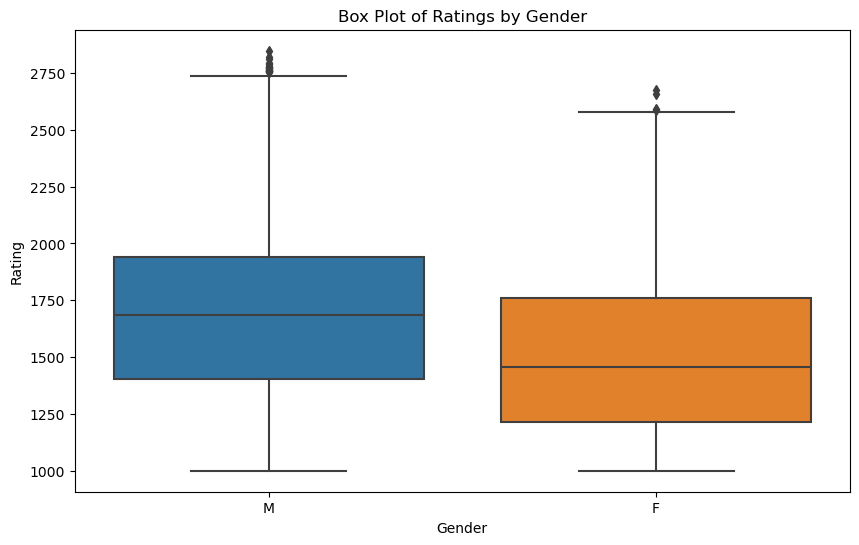

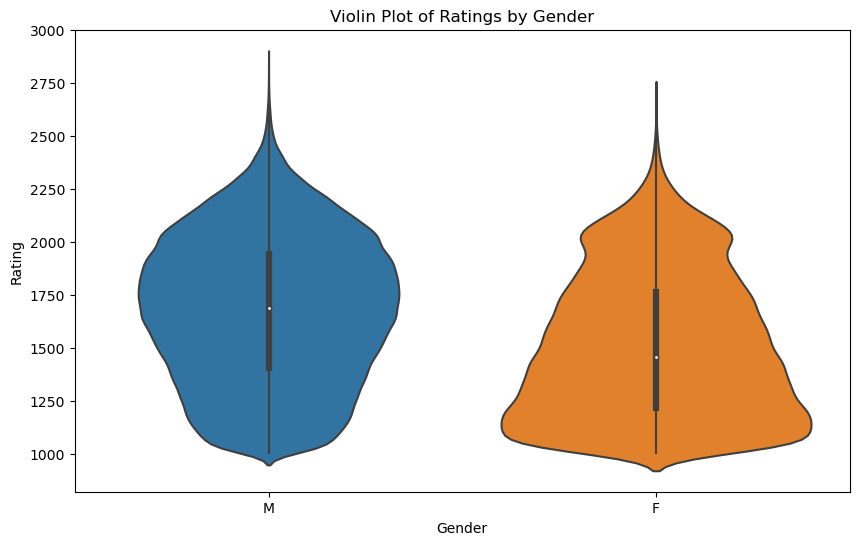

In [145]:
# Assuming 'rating_0' is the rating and 'sex_0' is the gender column in your DataFrame df_std_

# Create a new DataFrame for plotting that only contains the 'rating_0' and 'sex_0' columns
plot_data = df_std_[['rating_0', 'sex_0']]
plot_data = plot_data.rename(columns={'rating_0': 'Rating', 'sex_0': 'Gender'})

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Rating', data=plot_data)
plt.title('Box Plot of Ratings by Gender')
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Rating', data=plot_data)
plt.title('Violin Plot of Ratings by Gender')
plt.show()

The box plot and violin plot both suggest a broader distribution of ratings among male players with a higher median rating, whereas female players display a narrower interquartile range indicating less variance in their ratings. The violin plot reveals that the male rating distribution is more peaked around the median, while the female distribution has a slight bimodality, indicating two common rating levels among females.

/var/folders/0r/mh02trg51d7880t5fblpxd5w0000gn/T/ipykernel_83452/3973983854.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_std_['rating_0'], label='2021', shade=True, color='red')
/Users/ppch/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/0r/mh02trg51d7880t5fblpxd5w0000gn/T/ipykernel_83452/3973983854.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_std_1['rating_0'], label='2022', shade=True, color='blue')
/Users/ppch/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_i

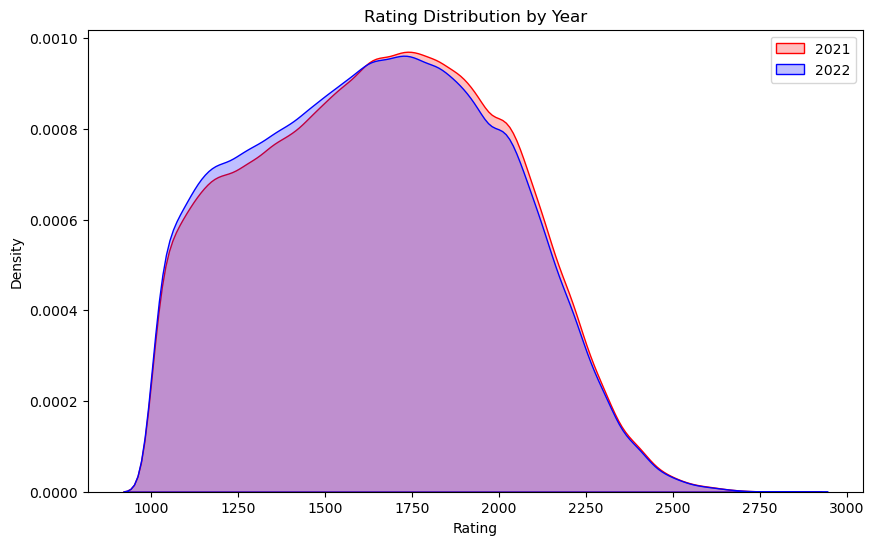

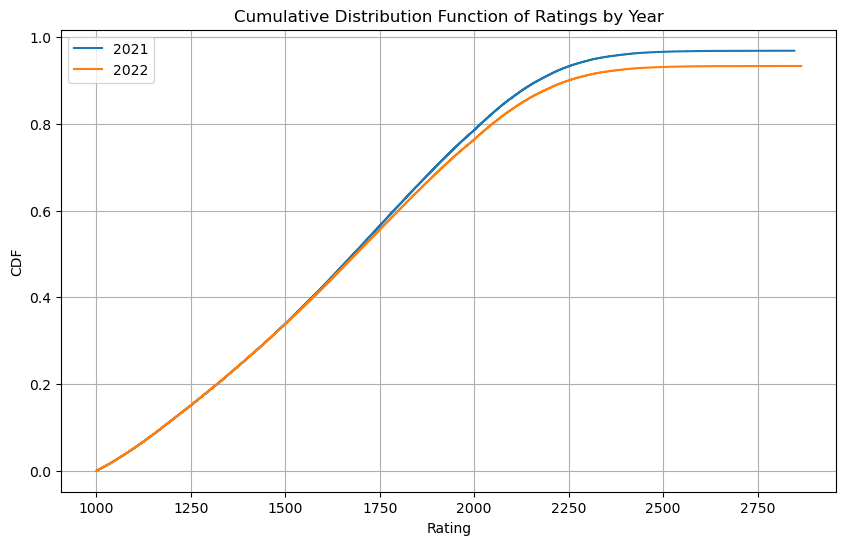

<Figure size 1000x600 with 0 Axes>

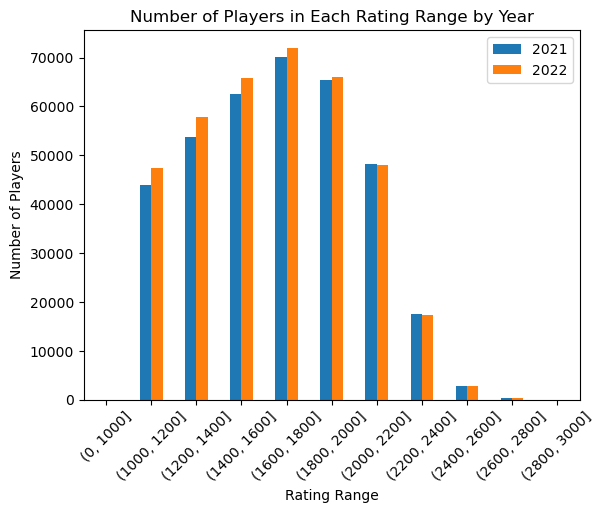

In [153]:
# What is the distribution of popularity of the ratings throught 21 and 22?
# Assuming df_std_ is your DataFrame and it includes 'rating
# Ensure you have two DataFrames: df_std_ for '21 and df_std_1 for '22, and both have a column 'rating_0'

plt.figure(figsize=(10, 6))

# KDE plot for '21
sns.kdeplot(df_std_['rating_0'], label='2021', shade=True, color='red')

# KDE plot for '22
sns.kdeplot(df_std_1['rating_0'], label='2022', shade=True, color='blue')

plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Rating Distribution by Year')
plt.legend()

plt.show()

# what about the CDF?

# Separate the ratings for each year
ratings_21 = df_std_['rating_0']
ratings_22 = df_std_1['rating_0']

# Calculate the CDF for 2021

ratings_21_sorted = np.sort(ratings_21)
ratings_21_cdf = np.arange(1, len(ratings_21_sorted)+1) / len(ratings_21_sorted)

# Calculate the CDF for 2022
ratings_22_sorted = np.sort(ratings_22)
ratings_22_cdf = np.arange(1, len(ratings_22_sorted)+1) / len(ratings_22_sorted)

# Plot the CDFs
plt.figure(figsize=(10, 6))
plt.plot(ratings_21_sorted, ratings_21_cdf, label='2021')
plt.plot(ratings_22_sorted, ratings_22_cdf, label='2022')

plt.xlabel('Rating')
plt.ylabel('CDF')

plt.title('Cumulative Distribution Function of Ratings by Year')

plt.legend()

plt.grid()

plt.show()

# how many players are there in each rating range for 21 and 22?


# Define the bins for the rating ranges. Adjust these values as needed for your specific analysis.
bins = [0, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]

# Use pd.cut to categorize the ratings into the defined bins for each year.
df_std_['rating_bin'] = pd.cut(df_std_['rating_0'], bins=bins)
df_std_1['rating_bin'] = pd.cut(df_std_1['rating_0'], bins=bins)

# Count the number of players in each bin for '21.
player_count_21 = df_std_['rating_bin'].value_counts().sort_index()

# Count the number of players in each bin for '22.
player_count_22 = df_std_1['rating_bin'].value_counts().sort_index()

# Combine the counts into a single DataFrame for easier comparison.
rating_ranges_df = pd.DataFrame({
    '2021': player_count_21,
    '2022': player_count_22
})

rating_ranges_df

# Plot the number of players in each rating range for '21 and '22.

plt.figure(figsize=(10, 6))
rating_ranges_df.plot(kind='bar', stacked=False)
plt.title('Number of Players in Each Rating Range by Year')
plt.xlabel('Rating Range')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()





